# Explore here

Importación de librerías:

In [17]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Nos quedamos solo con las columans, latitude, longitud y medinc tal y como se solicita en el enunciado.

In [18]:
df = df[['Latitude', 'Longitude', 'MedInc']]

Seleccionamos esas tres columnas para la variable X

In [19]:
X = df[["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Hacemos el split de los datos en 80-20 en entrenamiento y prueba.

In [20]:
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


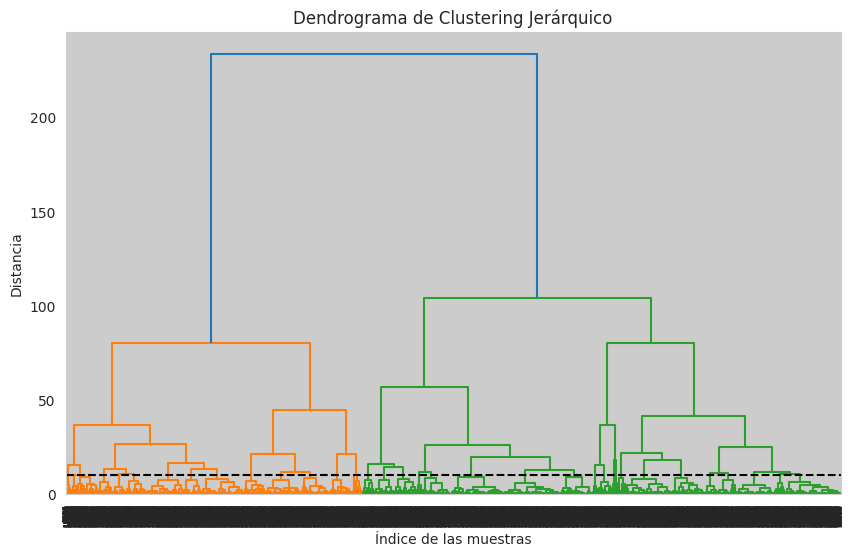

In [21]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train[["MedInc", "Latitude", "Longitude"]])

Z = linkage(X_scaled, method='ward')


plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode="level", p=20)
plt.axhline(y=10, c='k', linestyle='--')  
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de las muestras")
plt.ylabel("Distancia")
plt.show()

Creamos el modelo con 6 clusters tal y como se pide en el enunciado.

In [22]:

from sklearn.cluster import KMeans

model_unsup = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model_unsup.fit(X_train)

KMeans(n_clusters=6, random_state=42)

Se obtienen los labels del cluster asignadas a cada muestra.

In [23]:
y_train = list(model_unsup.labels_)
X_train["cluster"] = y_train
X_train.head()


,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


Se realizan las visualizaciones de los clusters.

♡ Gráfico 1 (Latitude vs Longitude):
Muestra cómo se agrupan las viviendas geográficamente por región en California según los clusters.

♡  Gráfico 2 (Latitude vs MedInc):
Relaciona el ingreso medio con la ubicación norte-sur. Algunos clusters tienen ingresos altos, otros bajos.

♡ Gráfico 3 (Longitude vs MedInc):
Relaciona el ingreso medio con la ubicación este-oeste. También muestra diferencias claras entre clusters según ingreso.

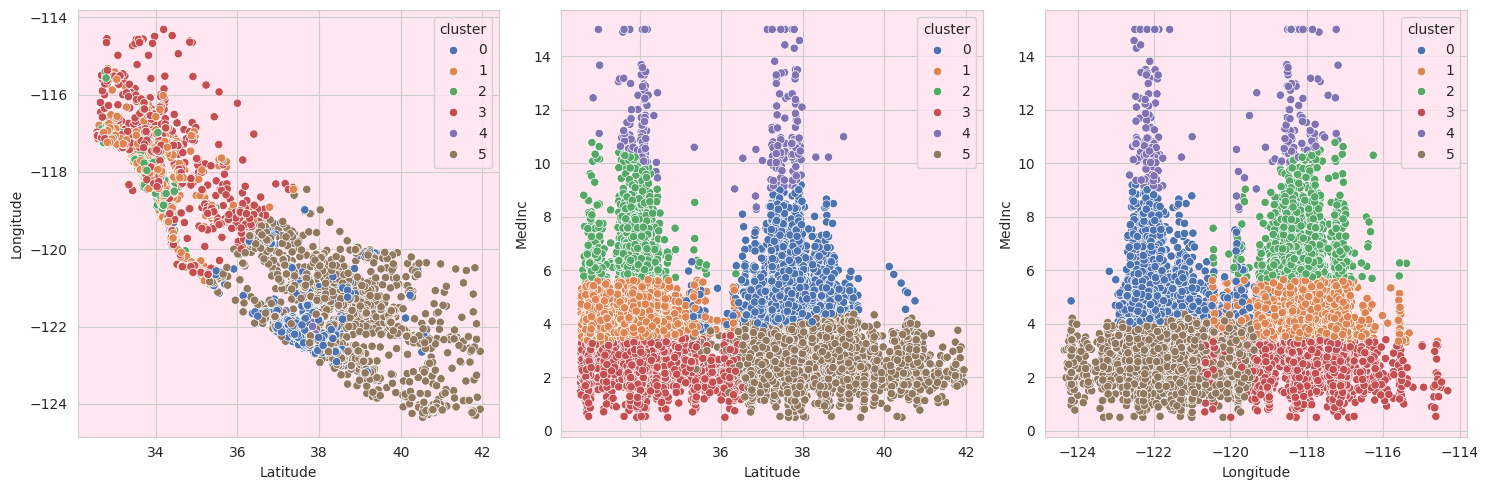

In [24]:
plt.style.use('default')
sns.set_style("whitegrid", {'axes.facecolor': '#ffe6f0'})


fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()


Creamos un modelo de KMeans con 6 clusters.

Lo ajustamos con los datos de entrenamiento. 

In [25]:
y_test = list(model_unsup.predict(X_test))
X_test["cluster"] = y_test
X_test.head()


,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


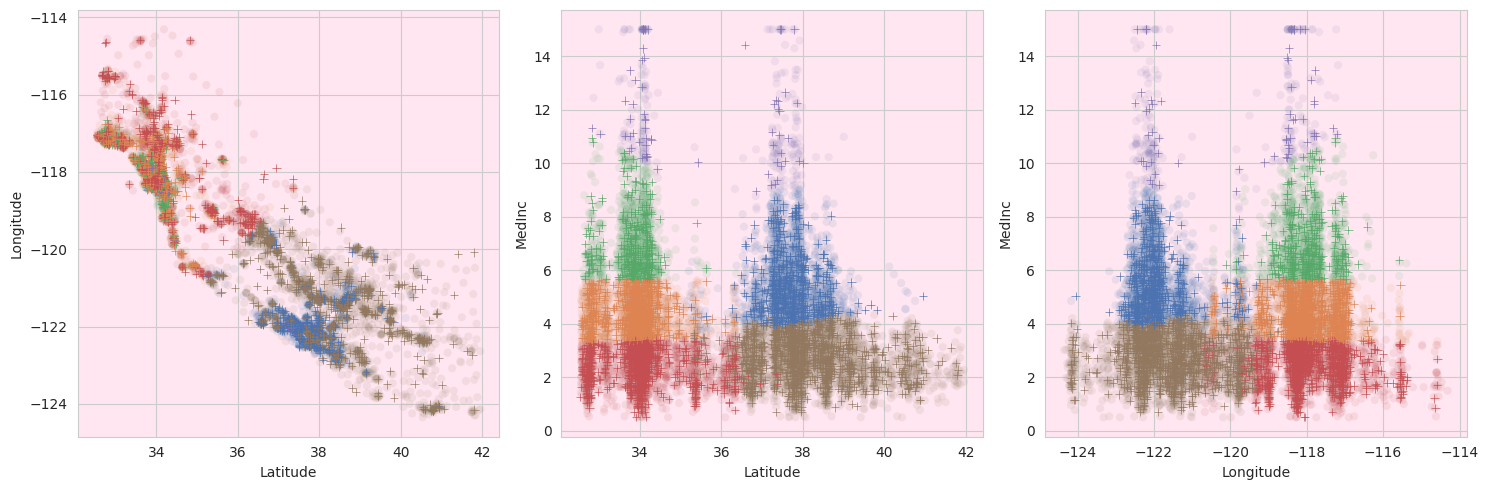

In [26]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier

model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

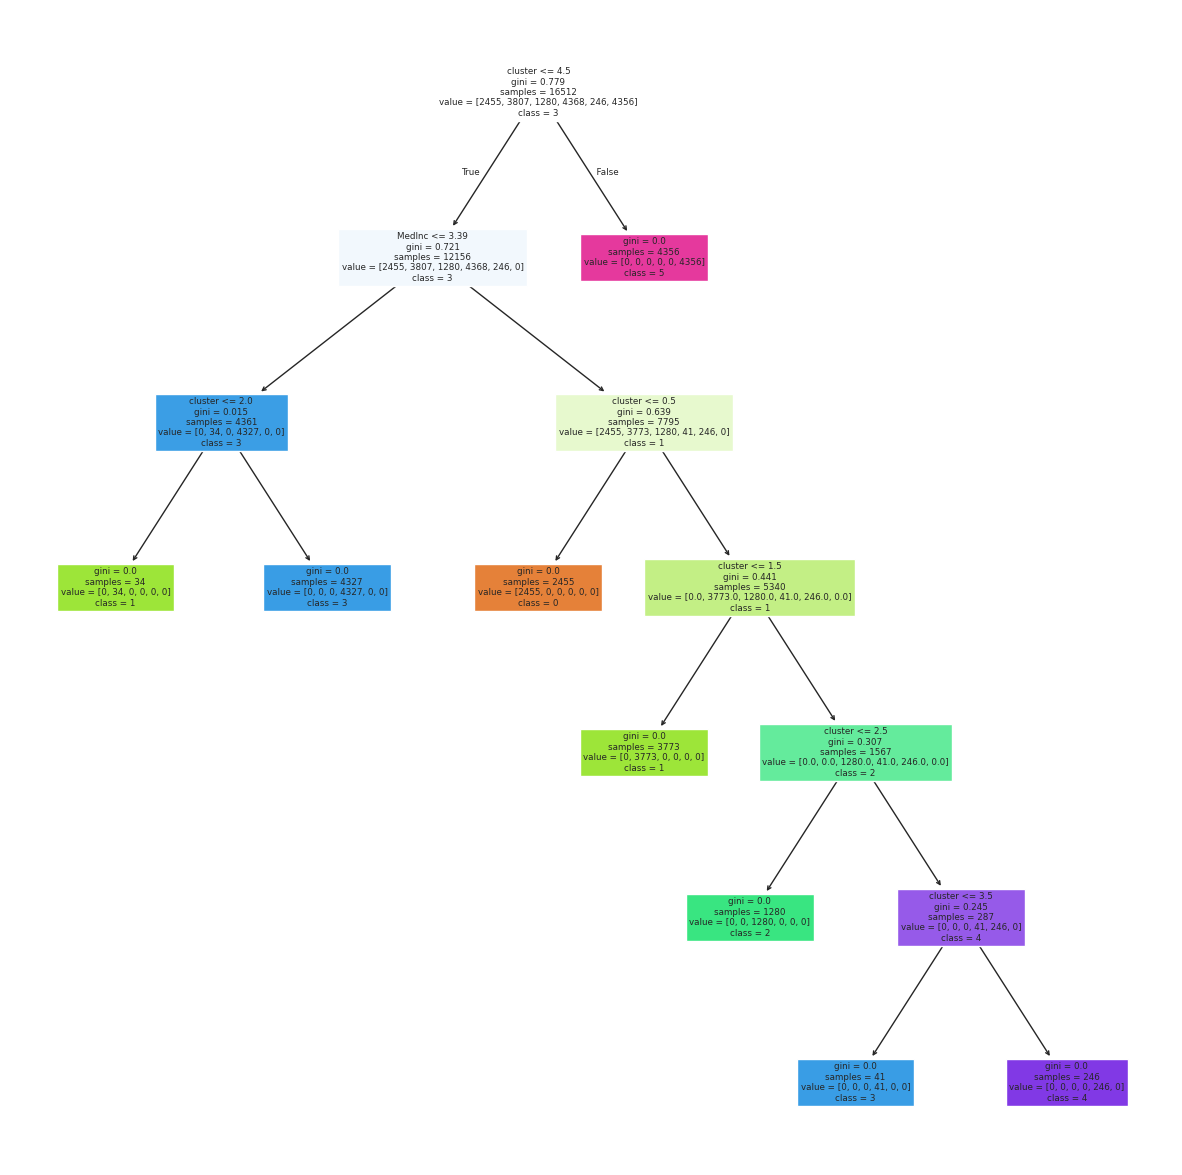

In [28]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [29]:


y_pred = model_sup.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], shape=(4128,), dtype=int32)

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


1.0

In [31]:
import os
import pickle

os.makedirs("/workspaces/MariaMiura1-K-Medias/models", exist_ok=True)

with open("/workspaces/MariaMiura1-K-Medias/models/decision_tree_classifier_default_42.sav", "wb") as f:
    pickle.dump(model_sup, f)